In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [4]:
df = pd.read_csv("Dataset/fmnist_small.csv")

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


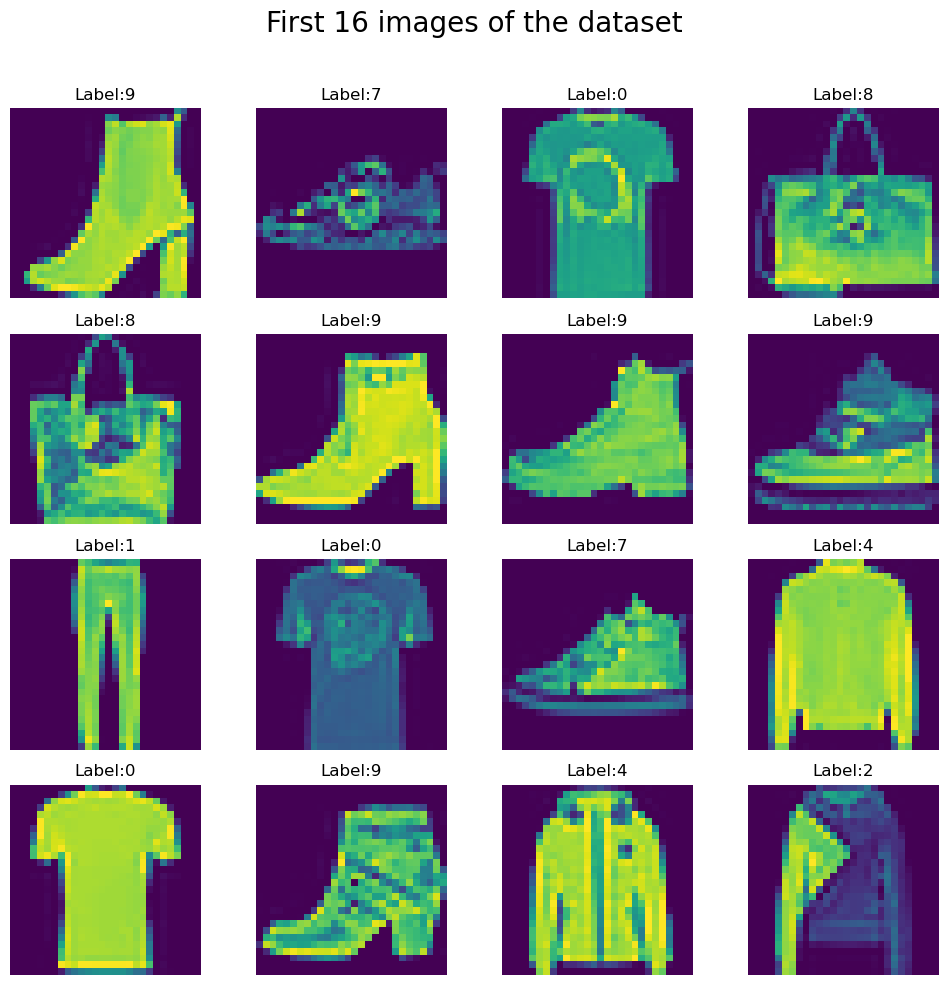

In [6]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images of the dataset",fontsize=20)

# Plot the first 16 images of the dataset 

for i,ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28) # Reshape to 28x28
    ax.imshow(img) # Display in grayscale
    ax.axis("off") # Remove axis fro a clearer image
    ax.set_title(f"Label:{df.iloc[i,0]}") # Show the label

plt.tight_layout(rect=[0,0,1,0.96]) # Adjust layout to fit the title
plt.show()

In [7]:
# train test split 

X = df.iloc[:,1:].values
y = df.iloc[:,0].values 


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# scaling the features
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [12]:
# Create a custom dataset class             

class CustomDataset(Dataset):
    def __init__(self,features,labels):

        self.features = torch.tensor(features,dtype=torch.float32)
        self.labels = torch.tensor(labels,dtype=torch.long)


    def __len__(self):

        return len(self.features)
    

    def __getitem__(self, index):
        return self.features[index],self.labels[index]



In [13]:
# create train dataset object

train_dataset = CustomDataset(X_train,y_train)

In [17]:
len(train_dataset)

4800

In [18]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [19]:
# create test dataset object

test_dataset= CustomDataset(X_test,y_test)

In [20]:
# create train and test loader

train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [21]:
# Define NN Class

class MyNN(nn.Module):

    def __init__(self,num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,x):
        return self.model(x)    

In [22]:
# Set learning rate and epochs 

epochs = 100
learning_rate = 0.1

In [23]:
# Initialize the model

model = MyNN(num_features=X_train.shape[1])

# loss function

criteria = nn.CrossEntropyLoss()


# optimizer

optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [24]:
len(train_loader)

150

In [27]:
# Training Loop


for epoch in range(epochs):
    
    total_epoch_loss = 0

    for batch_features,batch_labels in train_loader:

        # forward pass

        outputs = model(batch_features)





        # calcuate loss
        loss = criteria(outputs,batch_labels)

        # back propogation
        optimizer.zero_grad()
        loss.backward()



        # update gradients

        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()

    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')



Epoch: 1 , Loss: 0.11245916773875554
Epoch: 2 , Loss: 0.12127139503757159
Epoch: 3 , Loss: 0.10223075304180383
Epoch: 4 , Loss: 0.10085110801582535
Epoch: 5 , Loss: 0.0910196897185718
Epoch: 6 , Loss: 0.09763544281944632
Epoch: 7 , Loss: 0.0920899940499415
Epoch: 8 , Loss: 0.081592756404231
Epoch: 9 , Loss: 0.09419763570651413
Epoch: 10 , Loss: 0.07807830504452189
Epoch: 11 , Loss: 0.08948475131144126
Epoch: 12 , Loss: 0.07805260610456267
Epoch: 13 , Loss: 0.06018024234722058
Epoch: 14 , Loss: 0.08821793897698323
Epoch: 15 , Loss: 0.0695487345630924
Epoch: 16 , Loss: 0.13616945622178414
Epoch: 17 , Loss: 0.07867261338513344
Epoch: 18 , Loss: 0.08325981160936256
Epoch: 19 , Loss: 0.06789753073981653
Epoch: 20 , Loss: 0.05707935972604901
Epoch: 21 , Loss: 0.06137134438070158
Epoch: 22 , Loss: 0.07158251860179007
Epoch: 23 , Loss: 0.10043773750852172
Epoch: 24 , Loss: 0.08576721523577968
Epoch: 25 , Loss: 0.07674440017901361
Epoch: 26 , Loss: 0.043972991172534726
Epoch: 27 , Loss: 0.03840

In [28]:
# set model to eval mode


model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [30]:
len(test_loader)

38

In [31]:
# Evaluation code 
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs,1)
        total = total + batch_labels.shape[0]

        correct = correct + (predicted == batch_labels).sum().item()


print(correct/total)



0.835
